# 와인 데이터 분류

In [59]:
import pandas as pd

# 데이터 로딩
file_path = "D:/AI_data/wine.csv"

df = pd.read_csv(file_path)
df

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [60]:
df.columns

Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')

In [61]:
# 결측치 확인
df.isnull().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [62]:
# 레이블 확인
df['Wine'].value_counts()

Wine
2    71
1    59
3    48
Name: count, dtype: int64

In [63]:
# 데이터 분할
from sklearn.model_selection import train_test_split

X = df.drop('Wine', axis=1)
y = df['Wine']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# 데이터 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 머신러닝

In [65]:
# 랜덤 포레스트 학습 및 평가
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

Random Forest Accuracy: 1.0000


In [66]:
# 결정 트리 학습 및 평가
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

Decision Tree Accuracy: 0.9444


In [67]:
# 로지스틱 회귀 학습 및 평가
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)

print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")

Logistic Regression Accuracy: 1.0000


In [68]:
# KNN 학습 및 평가
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

print(f"KNN Model Accuracy: {knn_accuracy:.4f}")

KNN Model Accuracy: 0.9444


In [69]:
# SVM 학습 및 평가
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)

print(f"SVM Accuracy: {svm_accuracy:.4f}")

SVM Accuracy: 1.0000


## 딥러닝

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [71]:
# 원-핫 인코딩: 데이터의 연관성 제거
Y = pd.get_dummies(y).values

In [72]:
# Numpy 변환
X = X.values

In [73]:
# 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [74]:
# 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

# 모델 생성
model = Sequential()

# 입력층 + 첫 번째 은닉층
model.add(Dense(16, input_shape=(13,), activation='relu'))

# 두 번째 은닉층
model.add(Dense(8, activation='relu'))

# 세 번째 은닉층
model.add(Dense(4, activation='relu'))

# 출력층 (뉴런 3개, softmax 활성화)
model.add(Dense(3, activation='softmax'))

# 다중 클래스 분류(Multi-class, Single-Label), 손실 함수로 categorical_crossentropy 사용
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 요약
model.summary()

C:\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 16)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 3)                   │              15 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 411 (1.61 KB)

 Trainable params: 411 (1.61 KB)

 Non-trainable params: 0 (0.00 B)

#### model.fit()
- epochs=30 : 30번 반복 학습
- batch_size=32 : 데이터를 32개씩 묶어서 학습 진행 (미니 배치 학습)
- validation_data=(X_test, y_test) : 검증 데이터(X_test, y_test)를 이용해 매 epoch마다 검증 성능 평가
- 출력값 → model_history
- model_history.history['loss'] : 훈련 손실 값
- model_history.history['val_loss'] : 검증 손실 값
- model_history.history['accuracy'] : 훈련 정확도
- model_history.history['val_accuracy'] : 검증 정확도

In [76]:
# 모델 학습
model_history = model.fit(x=X_train, y=y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# 모델 예측 - softmax 출력을 포함한 확률값, 확률이 가장 높은 클래스가 최종 예측 클래스
y_pred = model.predict(X_test)

# 실제 정답 라벨 (원-핫 인코딩 -> 정수 변환)
y_test_class = np.argmax(y_test, axis=1)

# 예측된 라벨 (확률 값 -> 가장 높은 값의 인덱스 선택)
y_pred_class = np.argmax(y_pred, axis=1)


Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 161ms/step - accuracy: 0.3039 - loss: 1.1077 - val_accuracy: 0.6111 - val_loss: 0.9606
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.4987 - loss: 0.9463 - val_accuracy: 0.8611 - val_loss: 0.7473
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8093 - loss: 0.7350 - val_accuracy: 0.8056 - val_loss: 0.5512
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8465 - loss: 0.5608 - val_accuracy: 0.8611 - val_loss: 0.4159
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9516 - loss: 0.4399 - val_accuracy: 0.9444 - val_loss: 0.3170
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9873 - loss: 0.3568 - val_accuracy: 0.9722 - val_loss: 0.2558
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9752 - loss: 0.2934 - val_accuracy: 0.9722 - val_loss: 0.2253
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9838 - loss: 0.2766 - val_accuracy: 0.9722 - val_loss: 0.2265

#### 손실 그래프 출력
- 두 그래프가 같이 감소해야 잘 학습된 모델
- 검증 손실이 증가하면 과적합

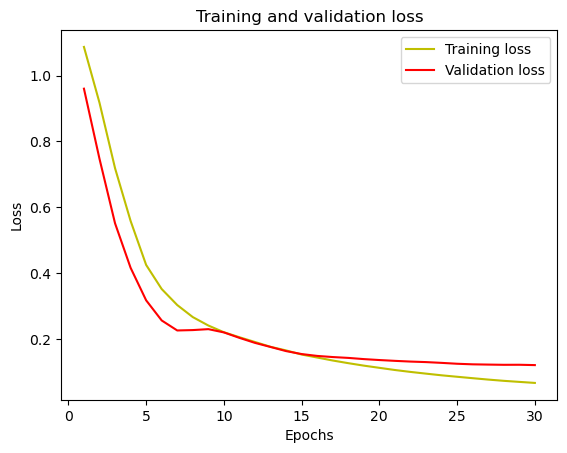

In [77]:
import matplotlib.pyplot as plt

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'y', label='Training loss')  # 훈련 손실
plt.plot(epochs, val_loss, 'r', label='Validation loss')  # 검증 손실
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### 정확도 그래프 출력
- 훈련 정확도가 높고 검증 정확도가 낮으면 과적합

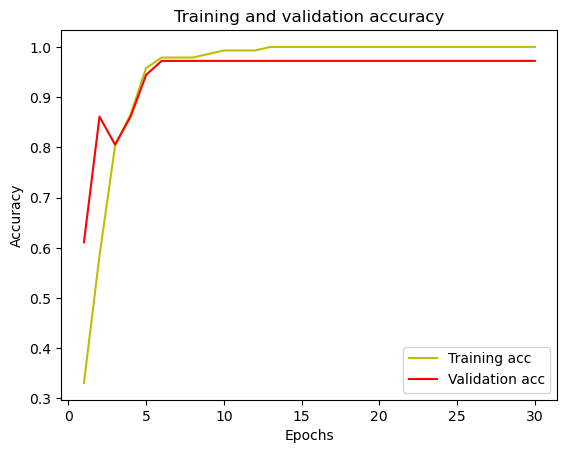

In [79]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')  # 훈련 정확도
plt.plot(epochs, val_acc, 'r', label='Validation acc')  # 검증 정확도
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### classification_report()
- 각 클래스별 정확도, 정밀도(Precision), 재현율(Recall), f1-score를 출력
- Precision (정밀도): 모델이 "예측한 클래스" 중에서 실제로 맞는 비율
- Recall (재현율): 실제 클래스 중에서 모델이 맞게 예측한 비율
- F1-score: 정밀도와 재현율의 조화 평균
- Accuracy: 전체 샘플에서 맞춘 비율

In [80]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.94      0.97        16
           2       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36

[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]
